In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("superconductivty+data/train.csv")

X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Decision Tree 
dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"\n Decision Tree R²: {r2_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"\n Random Forest R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


 Decision Tree R²: 0.8697
MAE: 7.4337
RMSE: 12.2449

 Random Forest R²: 0.9283
MAE: 5.2830
RMSE: 9.0828


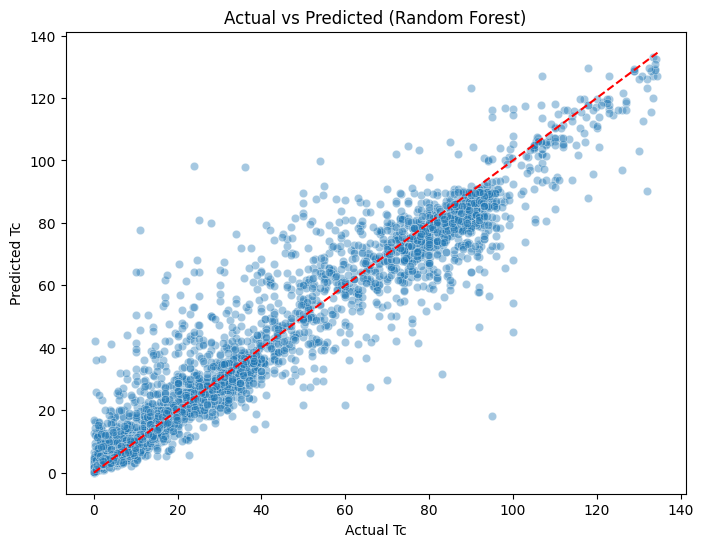

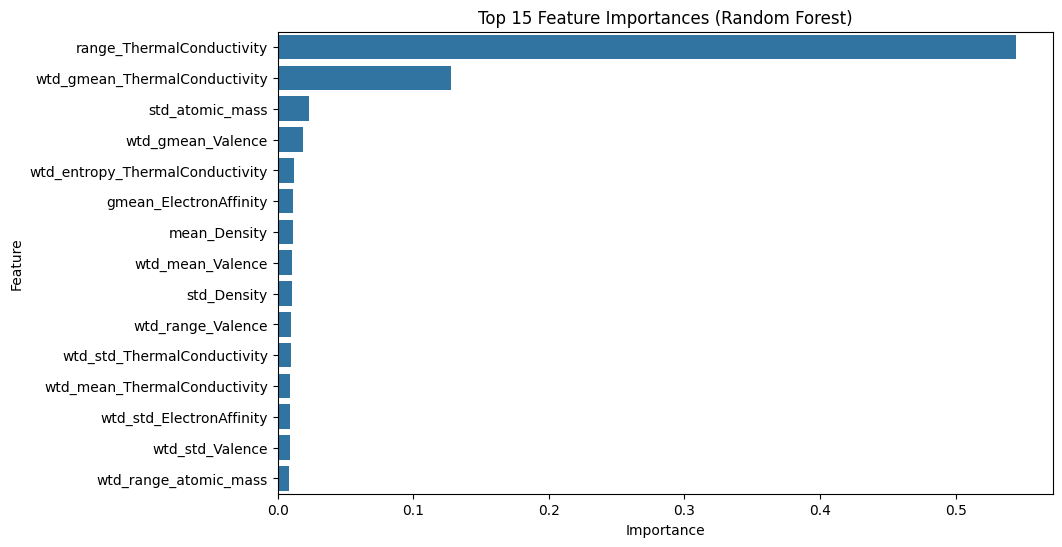

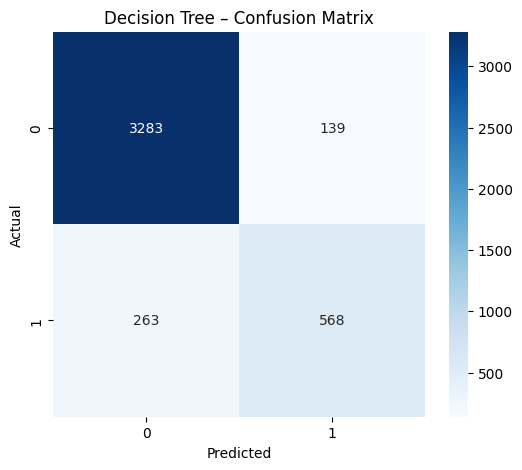

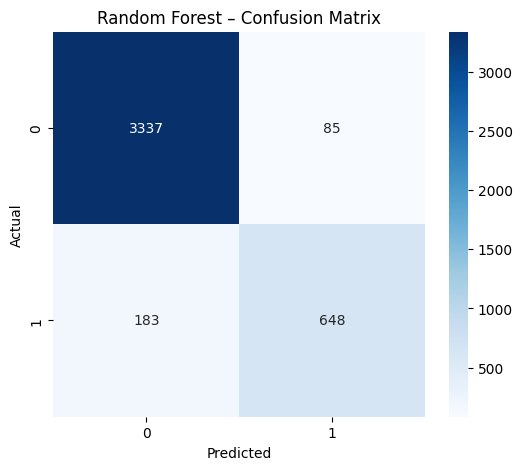


 Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3422
           1       0.80      0.68      0.74       831

    accuracy                           0.91      4253
   macro avg       0.86      0.82      0.84      4253
weighted avg       0.90      0.91      0.90      4253


 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3422
           1       0.88      0.78      0.83       831

    accuracy                           0.94      4253
   macro avg       0.92      0.88      0.90      4253
weighted avg       0.94      0.94      0.94      4253



In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

y_test_binary = (y_test >= 75).astype(int)
y_pred_dt_class = (y_pred_dt >= 75).astype(int)
y_pred_rf_class = (y_pred_rf >= 75).astype(int)

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test_binary, y_pred_dt_class, "Decision Tree – Confusion Matrix")
plot_cm(y_test_binary, y_pred_rf_class, "Random Forest – Confusion Matrix")

print("\n Decision Tree Classification Report")
print(classification_report(y_test_binary, y_pred_dt_class))

print("\n Random Forest Classification Report")
print(classification_report(y_test_binary, y_pred_rf_class))
